# Sujet M1 Maths Augmentation donnees 2024-2025

## Import des packages

In [1]:
import sklearn.cross_decomposition as skdec
import sklearn.metrics as skmet
import pandas as pd
import numpy as np
import scipy.stats as scsts
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## MODIFICATIONS POSSIBLES 1 : 

Vous pouvez apporter des modifications a votre Training set.

## Chargement de la donnée

In [2]:
def load_data(path="Dataset_Reetz.csv"):
  dataset_df = pd.read_csv(path, sep=";")
  return dataset_df

SEQUENCE_KEY: str = "seq"
ACTIVITY_KEY: str = "act"
WHICH_SET_KEY: str = "set"
IS_TRAIN_SET_KEY: str = "TRAIN"


DATASET_DF = load_data()
DATASET_DF.head()

,id,mut,seq,act,set
0,WT,wt,NHKAFAKFPSSASISPNPFTVSIPDEQLDDLKTLVRLSKIAPPTYE...,-0.85,TRAIN
1,S1,L215F,NHKAFAKFPSSASISPNPFTVSIPDEQLDDLKTLVRLSKIAPPTYE...,-1.50,TRAIN
2,S2,A217N,NHKAFAKFPSSASISPNPFTVSIPDEQLDDLKTLVRLSKIAPPTYE...,-1.17,TRAIN
3,S3,R219S,NHKAFAKFPSSASISPNPFTVSIPDEQLDDLKTLVRLSKIAPPTYE...,-0.85,TRAIN
4,F,L249Y,NHKAFAKFPSSASISPNPFTVSIPDEQLDDLKTLVRLSKIAPPTYE...,-0.85,TRAIN


## Definition de l'encodage (Cid et al. 1992 Hydrophobicity)



In [3]:
AA_CID920101_ENCODING = {
  'A': -0.45,
  'R': -0.24,
  'N': -0.2,
  'D': -1.52,
  'C': 0.79,
  'Q': -0.99,
  'E': -0.8,
  'G': -1.0,
  'H': 1.07,
  'I': 0.76,
  'L': 1.29,
  'K': -0.36,
  'M': 1.37,
  'F': 1.48,
  'P': -0.12,
  'S': -0.98,
  'T': -0.7,
  'W': 1.38,
  'Y': 1.49,
  'V': 1.26
}

## Fonction pour encoder une sequence

In [4]:
def encode_sequence(sequence, mapping=AA_CID920101_ENCODING):
  return np.asarray([mapping[aa] for aa in sequence])

## Extraction des sequences, de l'activite et de leur appartenance au Training set ou au Test set

In [5]:
SEQUENCES = DATASET_DF[SEQUENCE_KEY]
ACTIVITY = DATASET_DF[ACTIVITY_KEY]
IS_TRAIN = DATASET_DF[WHICH_SET_KEY] == IS_TRAIN_SET_KEY

## Application de la fonction d'encodage et construction de la matice de travail

In [6]:
ENCODED_SEQUENCES = np.stack(SEQUENCES.apply(encode_sequence).values)
ENCODED_SEQUENCES

array([[-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36],
       [-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36],
       [-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36],
       ...,
       [-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36],
       [-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36],
       [-0.2 ,  1.07, -0.36, ...,  1.38, -0.99, -0.36]])

## Separation des Training set et Test Set

In [7]:
X_TRAIN = ENCODED_SEQUENCES[IS_TRAIN]
Y_TRAIN = ACTIVITY[IS_TRAIN].values
X_TEST = ENCODED_SEQUENCES[~IS_TRAIN]
Y_TEST = ACTIVITY[~IS_TRAIN].values

## MODIFICATIONS POSSIBLES 2 : Vous  pouvez appliquer des transformations mathematiques a votre Training set.

## Definition et entrainement du modele PLS

modèle choisi : régression PLS (Partial LEast Squares) utile lorsque les variables prédictrices sont fortement corrélées/ que le nombre de variables prédictrices est supérieur au nombre d'observations.

<span style="color: red;">à détailler.</span>


In [8]:
MODEL = skdec.PLSRegression()
MODEL.fit(X_TRAIN, Y_TRAIN)


PLSRegression()

## Evaluation du modèle (Calcul des metriques de performance)

In [12]:
def evaluate_model(trained_model, x_test, y_test):
  predictions = trained_model.predict(x_test)
  correlation, _ = scsts.pearsonr(y_test, predictions)
  r2 = skmet.r2_score(y_test, predictions)
  rmse = skmet.root_mean_squared_error(y_test, predictions)
  data = {"Correlation": [correlation], "R2": [r2], "RMSE": [rmse]}
  return pd.DataFrame(data)

evaluate_model(MODEL, X_TEST, Y_TEST)

,Correlation,R2,RMSE
0,0.923426,0.592855,0.576412


## Affichage des prédictions: visualisation des plots

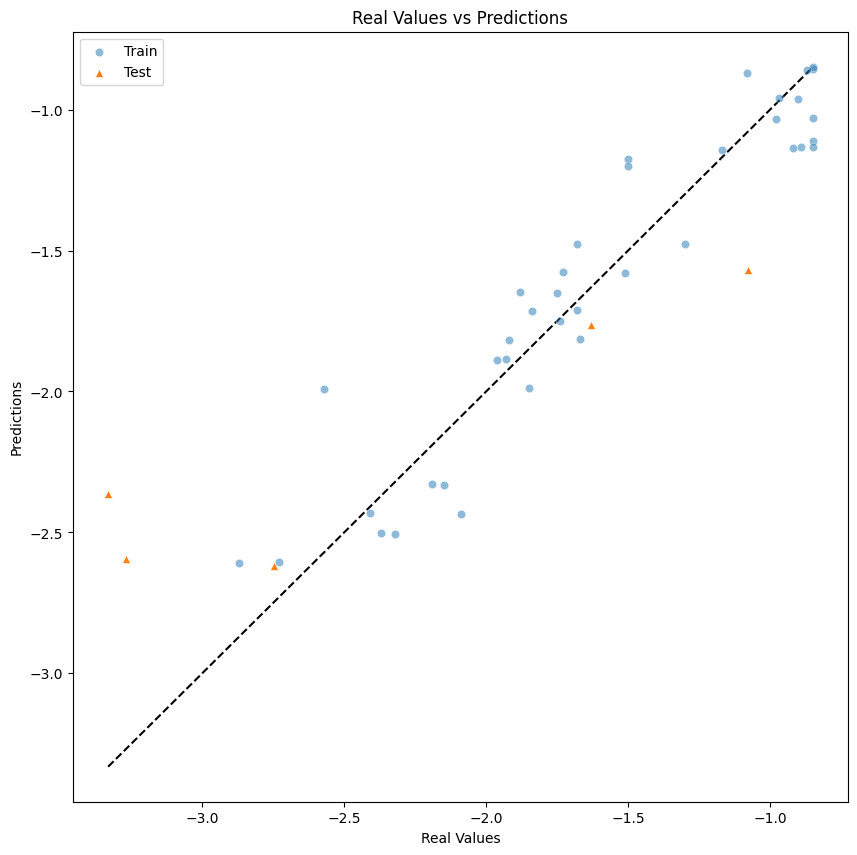

In [10]:
PALETTE = sns.color_palette("tab10")
TRAIN_COLOR = PALETTE[0]
TEST_COLOR = PALETTE[1]

def plot_regression(predictions, real_values, label, color, marker, alpha=0.5, ax=None):
  if ax is None:
    _, ax = plt.subplots(1, 1, figsize=(10, 10))
  sns.scatterplot(x=real_values, y=predictions, color=color, label=label, alpha=alpha, marker=marker, ax=ax)
  ax.set_xlabel("Real Values")
  ax.set_ylabel("Predictions")
  ax.set_title("Real Values vs Predictions")

TRAIN_PREDS = MODEL.predict(X_TRAIN)
TEST_PREDS = MODEL.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)
plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)

## Tests sur d'autres modèles

### Modèle Régréssion linéaire : Définition et Entraînement

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model_RL = LinearRegression()
model_RL.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

#### Evaluation du modèle

In [16]:
evaluate_model(model_RL,X_TEST,Y_TEST)

,Correlation,R2,RMSE
0,0.914782,0.714677,0.482533


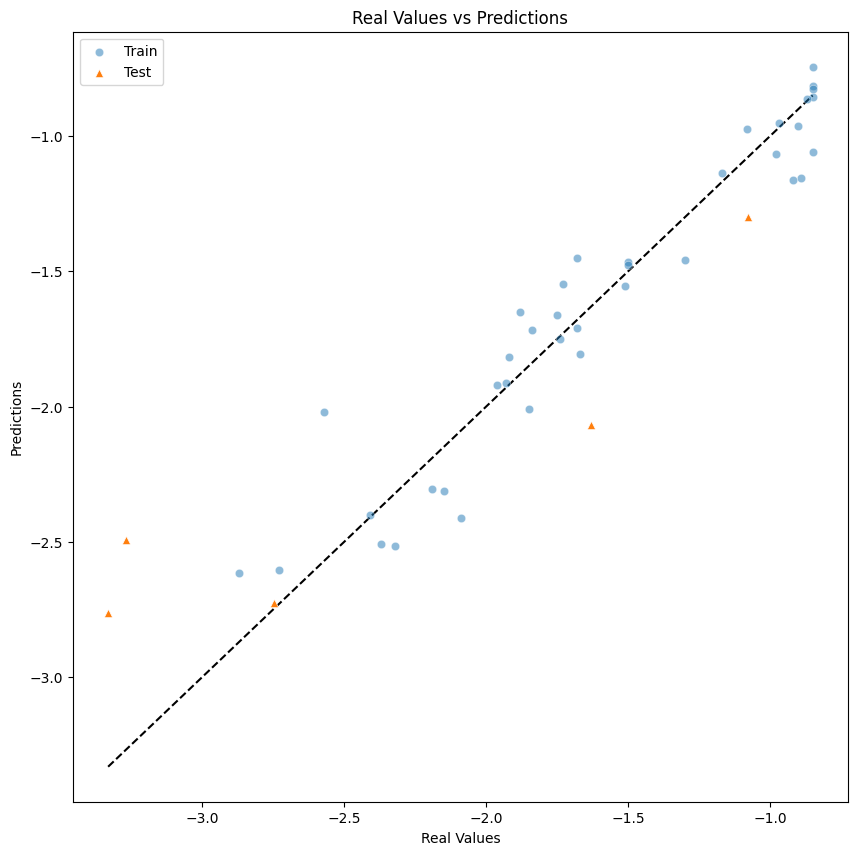

In [47]:
TRAIN_PREDS = model_RL.predict(X_TRAIN)
TEST_PREDS = model_RL.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)

plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)

### Modèle Régression Ridge : Définition et entraînement

In [19]:
from sklearn.linear_model import Ridge

In [21]:
model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_TRAIN,Y_TRAIN)

Ridge()

### Evaluation du modèle

In [25]:
evaluate_model(model_Ridge, X_TEST, Y_TEST)

,Correlation,R2,RMSE
0,0.731499,0.248082,0.783328


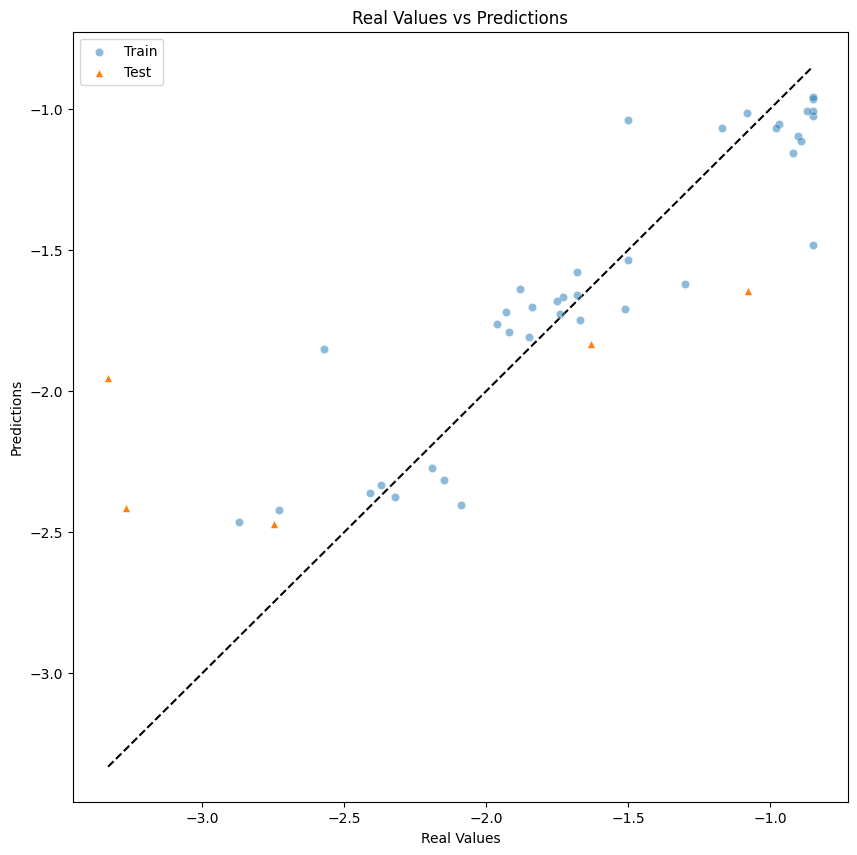

In [42]:
TRAIN_PREDS = model_Ridge.predict(X_TRAIN)
TEST_PREDS = model_Ridge.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)

plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)

## Modèle Régression Lasso : Définition et entraînement

In [26]:
from sklearn.linear_model import Lasso

In [27]:
model_L = Lasso(alpha=1.0)
model_L.fit(X_TRAIN, Y_TRAIN)

Lasso()

### Evaluation du modèle

In [28]:
evaluate_model(model_L, X_TEST, Y_TEST)

/var/folders/kd/pckgp4pd2mz19vk2ljkn8xf00000gp/T/ipykernel_44293/410568745.py:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = scsts.pearsonr(y_test, predictions)


,Correlation,R2,RMSE
0,NaN,-0.787365,1.207717


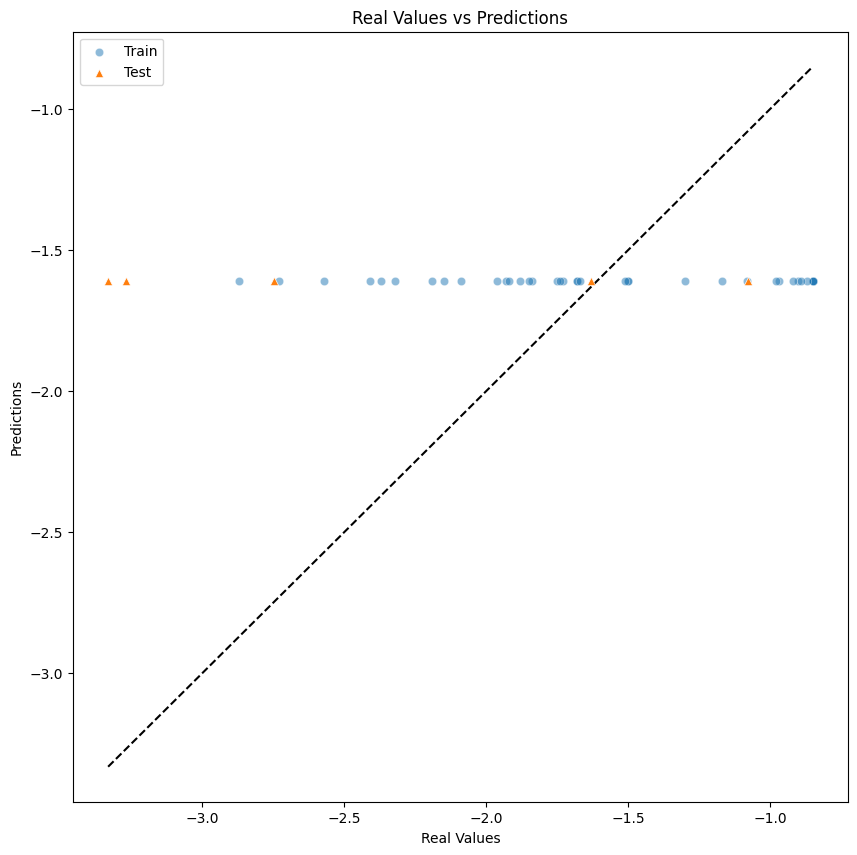

In [44]:
TRAIN_PREDS = model_L.predict(X_TRAIN)
TEST_PREDS = model_L.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)

plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)

## Modèle de régression avec forêts aléatoires : Définition et entraînement

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model_random = RandomForestRegressor(n_estimators=100, random_state=42)
model_random.fit(X_TRAIN,Y_TRAIN)

RandomForestRegressor(random_state=42)

### Evaluation du modèle

In [31]:
evaluate_model(model_random, X_TEST, Y_TEST)

,Correlation,R2,RMSE
0,0.926867,0.674157,0.515659


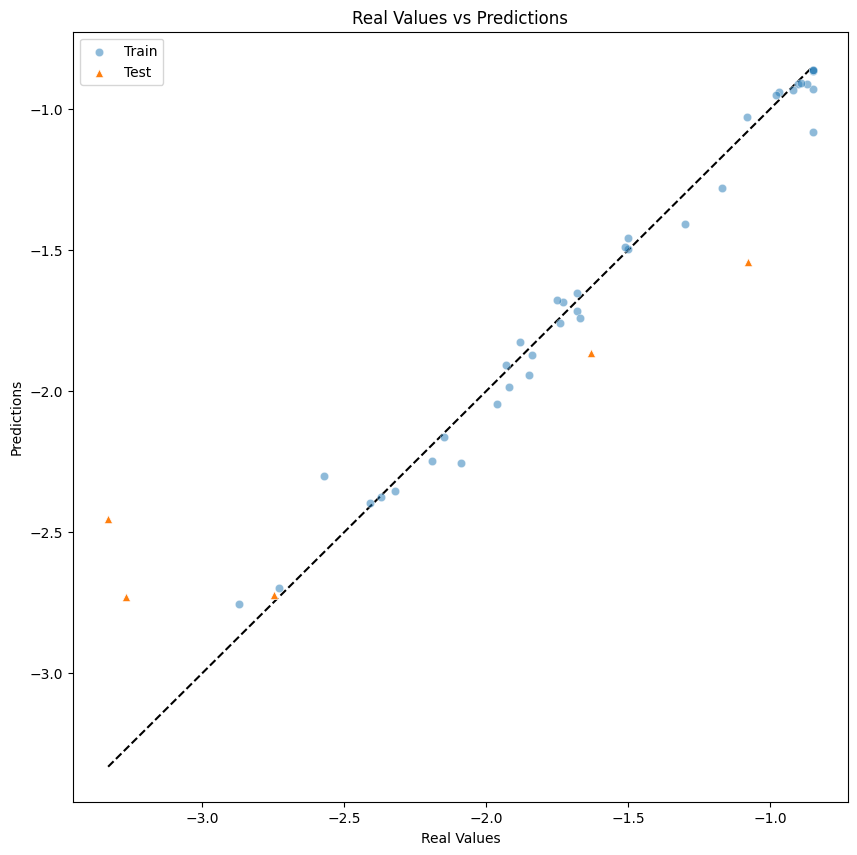

In [46]:
TRAIN_PREDS = model_random.predict(X_TRAIN)
TEST_PREDS = model_random.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)

plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)

## Régression avec machines à vecteurs de support : Définition et apprentissage

In [37]:
from sklearn.svm import SVR

In [38]:
model_svr = SVR(kernel='rbf')
model_svr.fit(X_TRAIN,Y_TRAIN)

SVR()

### Evaluation du modèle

In [39]:
evaluate_model(model_svr, X_TEST, Y_TEST)

,Correlation,R2,RMSE
0,0.936001,-0.357468,1.052503


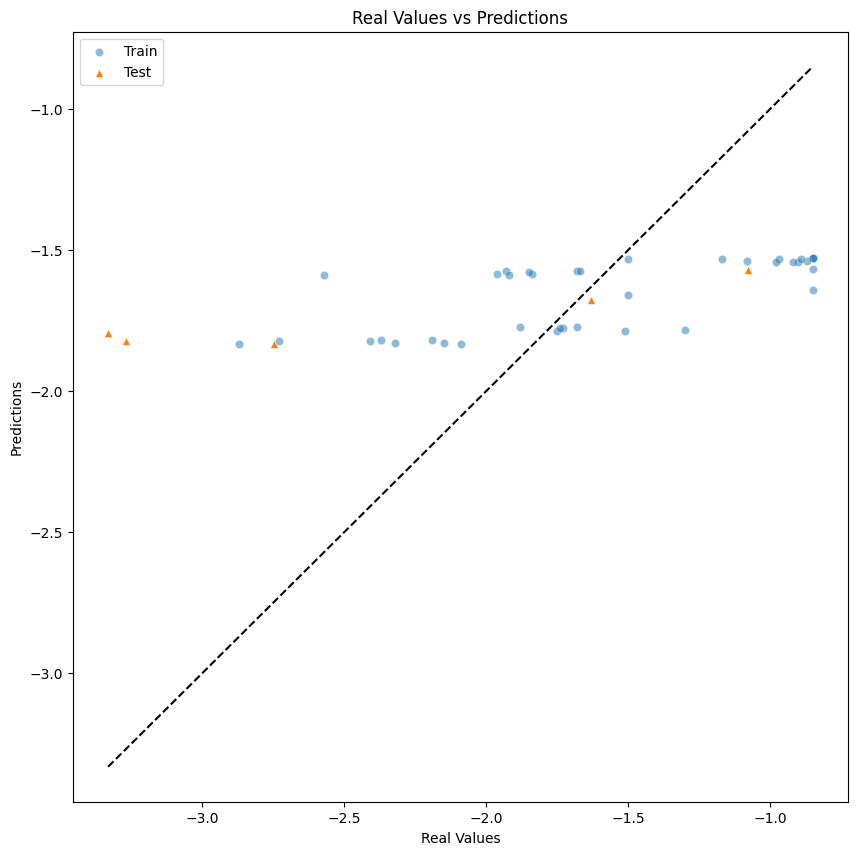

In [45]:
TRAIN_PREDS = model_svr.predict(X_TRAIN)
TEST_PREDS = model_svr.predict(X_TEST)

FIG, AX = plt.subplots(1, 1, figsize=(10, 10))
MIN_X = min(Y_TRAIN.min(), Y_TEST.min())
MAX_X = max(Y_TRAIN.max(), Y_TEST.max())
sns.lineplot(x=[MIN_X, MAX_X],
               y=[MIN_X, MAX_X],
               ax=AX, color="black", linestyle="--", zorder=-1)

plot_regression(TRAIN_PREDS, Y_TRAIN, "Train", TRAIN_COLOR, "o", ax=AX)
plot_regression(TEST_PREDS, Y_TEST, "Test", TEST_COLOR, "^", alpha=1, ax=AX)